In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [58]:
stroke_df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv')
stroke_df.drop('id', axis=1, inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


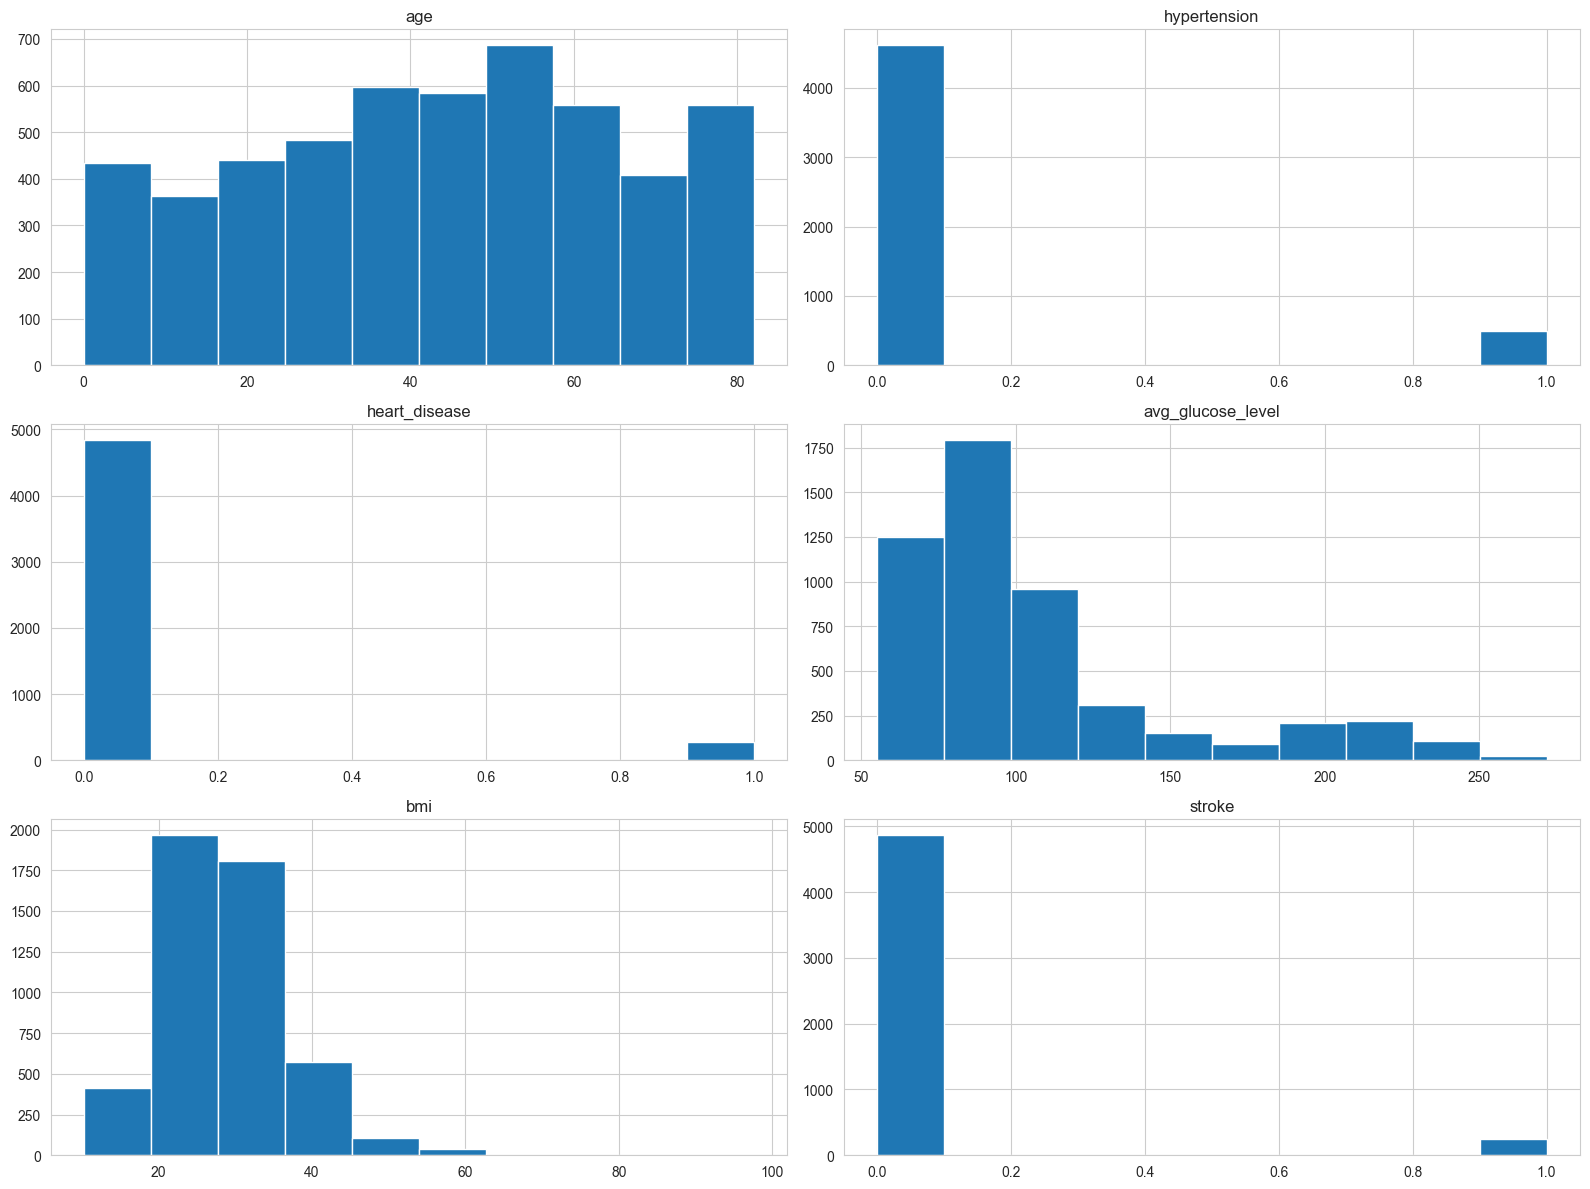

In [60]:
stroke_df.hist(figsize=(16, 12))
# plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

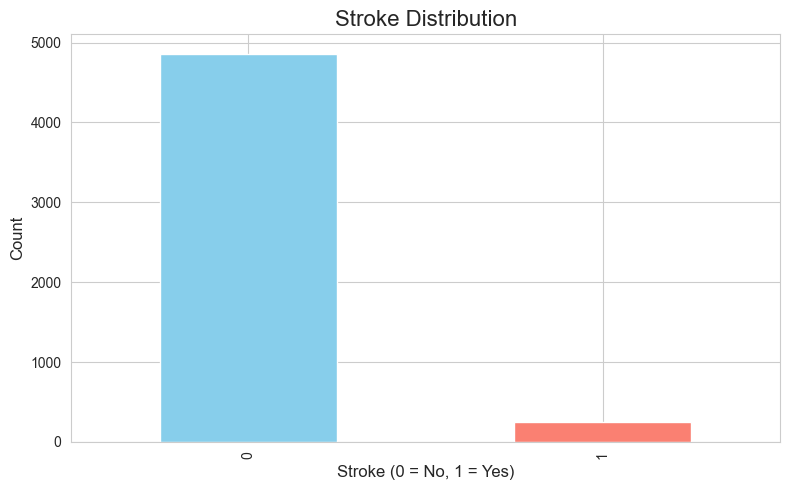

In [61]:
stroke_counts = stroke_df['stroke'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Stroke Distribution', fontsize=16)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [62]:
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [63]:
stroke_df['bmi'] = stroke_df['bmi'].fillna(stroke_df['bmi'].median())

In [64]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [65]:
stroke_df.duplicated().sum()

0

<Figure size 1000x1600 with 0 Axes>

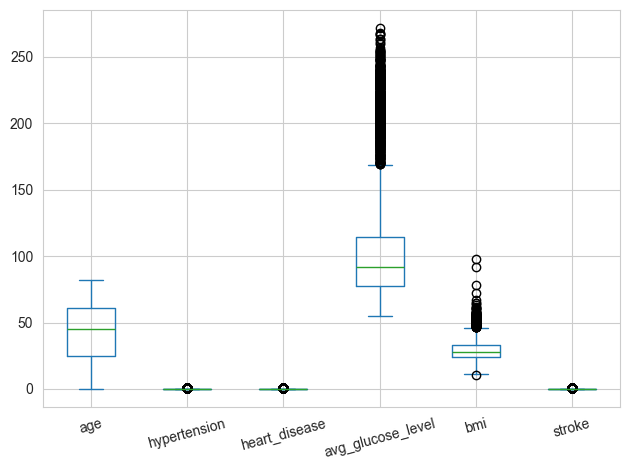

In [66]:
plt.figure(figsize=(10,16))
stroke_df.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [67]:
def log_transform(df, cols):
    data = df.copy()
    for col in cols:
        data[col] = np.log(df[col] + df[col].min())
    return data

In [68]:
log_stroke = log_transform(stroke_df, ['bmi', 'avg_glucose_level'])

<Figure size 1000x1600 with 0 Axes>

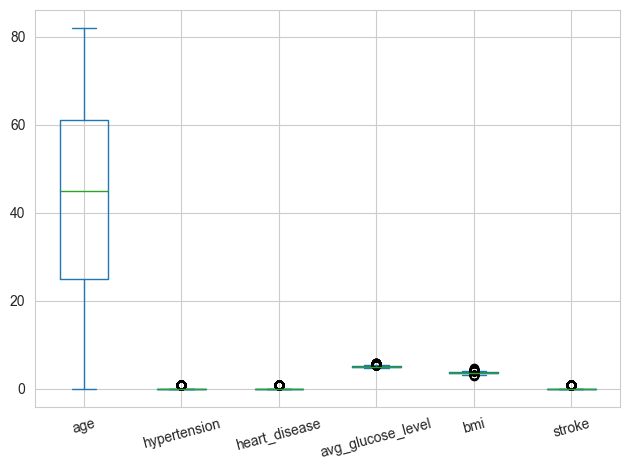

In [69]:
plt.figure(figsize=(10,16))
log_stroke.plot(kind='box')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [70]:
age_bins = [17, 35, 50, 65, 100]  
age_label = ['Young Adults', 'Adults', 'Middle-Aged', 'Elderly']  
log_stroke['age_segmentation'] = pd.cut(log_stroke['age'], bins=age_bins, labels=age_label)
log_stroke['age_segmentation'] = log_stroke['age_segmentation'].astype('object')

In [71]:
log_bmi_bins = [0, np.log(18.5), np.log(25), np.log(30), np.inf]
bmi_labels = [
    'Underweight',
    'Normal',
    'Overweight',
    'Obese_Class'
]

log_stroke['bmi_segmentation'] = pd.cut(log_stroke['bmi'], bins=log_bmi_bins, labels=bmi_labels)
log_stroke['bmi_segmentation'] = log_stroke['bmi_segmentation'].astype('object')

In [72]:
log_glucose_bins = [0, np.log(100), np.log(125), np.log(200), np.inf]

glucose_labels = [
    'Normal',               # Normal fasting glucose
    'Prediabetes',       # Impaired fasting glucose
    'Diabetes',          # Diabetes range
    'Severe_Hyperglycemia'  # Critical/emergency range
]

log_stroke['glucose_segmentation'] = pd.cut(log_stroke['avg_glucose_level'], bins=log_glucose_bins, labels=glucose_labels)
log_stroke['glucose_segmentation'] = log_stroke['glucose_segmentation'].astype('object')

In [73]:
log_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_segmentation,bmi_segmentation,glucose_segmentation
0,Male,67.0,0,1,Yes,Private,Urban,5.648305,3.848018,formerly smoked,1,Elderly,Obese_Class,Severe_Hyperglycemia
1,Female,61.0,0,0,Yes,Self-employed,Rural,5.550359,3.648057,never smoked,1,Middle-Aged,Obese_Class,Severe_Hyperglycemia
2,Male,80.0,0,1,Yes,Private,Rural,5.081653,3.756538,never smoked,1,Elderly,Obese_Class,Diabetes
3,Female,49.0,0,0,Yes,Private,Urban,5.422082,3.799974,smokes,1,Adults,Obese_Class,Severe_Hyperglycemia
4,Female,79.0,1,0,Yes,Self-employed,Rural,5.434769,3.535145,never smoked,1,Elderly,Obese_Class,Severe_Hyperglycemia


## Data Encoding

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

to_one_hot = log_stroke.select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

stroke_transformed = transformer.fit_transform(log_stroke)

In [75]:
stroke_transformed.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,...,bmi_segmentation_Obese_Class,bmi_segmentation_Overweight,glucose_segmentation_Prediabetes,glucose_segmentation_Severe_Hyperglycemia,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,67.0,0,1,5.648305,3.848018,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,61.0,0,0,5.550359,3.648057,1
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,80.0,0,1,5.081653,3.756538,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,49.0,0,0,5.422082,3.799974,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,79.0,1,0,5.434769,3.535145,1


In [76]:
apriori_stroke_df = stroke_transformed.drop(['bmi', 'avg_glucose_level', 'age'], axis=1)

In [77]:
from mlxtend.frequent_patterns import apriori, association_rules

frq_items = apriori(apriori_stroke_df, min_support = 0.01, use_colnames = True) 

In [78]:
frq_items.sort_values(by='support', ascending = False).head()

,support,itemsets
13,0.903327,(bmi_segmentation_Obese_Class)
1,0.656164,(ever_married_Yes)
48,0.645401,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
2,0.572407,(work_type_Private)
62,0.557730,"(work_type_Private, bmi_segmentation_Obese_Class)"


In [79]:
frq_items.shape

(1307, 2)

In [80]:
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 3) 
rules = rules.sort_values(['lift'], ascending =[False]) 
rules.sort_values(by='lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
399,"(age_segmentation_nan, bmi_segmentation_Overwe...","(work_type_children, glucose_segmentation_Pred...",0.073581,0.021722,0.013307,0.180851,8.325666,1.0,0.011709,1.194261,0.949775,0.162291,0.162662,0.396732
400,"(work_type_children, glucose_segmentation_Pred...","(age_segmentation_nan, bmi_segmentation_Overwe...",0.021722,0.073581,0.013307,0.612613,8.325666,1.0,0.011709,2.391453,0.899427,0.162291,0.581844,0.396732
554,"(work_type_children, gender_Male)","(Residence_type_Urban, age_segmentation_nan, b...",0.070646,0.035225,0.019961,0.282548,8.021237,1.0,0.017472,1.344725,0.941870,0.232346,0.256353,0.424608
541,"(Residence_type_Urban, age_segmentation_nan, b...","(work_type_children, gender_Male)",0.035225,0.070646,0.019961,0.566667,8.021237,1.0,0.017472,2.144664,0.907290,0.232346,0.533726,0.424608
551,"(age_segmentation_nan, bmi_segmentation_Overwe...","(Residence_type_Urban, work_type_children, gen...",0.073581,0.036791,0.019961,0.271277,7.373529,1.0,0.017254,1.321776,0.933033,0.220779,0.243442,0.406915


In [81]:
rules.shape

(804, 14)

In [82]:
has_stroke = rules[rules['consequents'] == frozenset({'stroke'})]

In [83]:
has_stroke.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
743,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.052055,0.048728,0.011155,0.214286,4.397590,1.0,0.008618,1.210710,0.815029,0.124454,0.174038,0.221601
448,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.055969,0.048728,0.011937,0.213287,4.377089,1.0,0.009210,1.209172,0.817280,0.128692,0.172988,0.229133
318,"(age_segmentation_Elderly, ever_married_Yes, g...",(stroke),0.052446,0.048728,0.011155,0.212687,4.364773,1.0,0.008599,1.208251,0.813561,0.123913,0.172357,0.220801


In [84]:
has_stroke.shape

(25, 14)

# Per Gender

In [93]:
male_stroke =  log_stroke[log_stroke['gender'] == 'Male']
female_stroke =  log_stroke[log_stroke['gender'] == 'Female']

In [94]:
female_stroke.shape, male_stroke.shape

((2994, 14), (2115, 14))

In [99]:
to_one_hot_male = log_stroke.drop('gender', axis=1).select_dtypes(include='object').columns.tolist()

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot_male)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

stroke_transformed_male = transformer.fit_transform(male_stroke)
stroke_transformed_female = transformer.fit_transform(female_stroke)

In [108]:
apriori_stroke_male_df = stroke_transformed_male.drop(['bmi', 'avg_glucose_level', 'age', 'gender'], axis=1)
apriori_stroke_female_df = stroke_transformed_female.drop(['bmi', 'avg_glucose_level', 'age', 'gender'], axis=1)

In [113]:
frq_items_male = apriori(apriori_stroke_male_df, min_support = 0.01, use_colnames = True) 
frq_items_male.sort_values(by='support', ascending = False).head()

,support,itemsets
12,0.889835,(bmi_segmentation_Obese_Class)
0,0.639243,(ever_married_Yes)
28,0.634988,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
1,0.553191,(work_type_Private)
42,0.544681,"(work_type_Private, bmi_segmentation_Obese_Class)"


In [114]:
frq_items_female = apriori(apriori_stroke_female_df, min_support = 0.01, use_colnames = True) 
frq_items_female.sort_values(by='support', ascending = False).head()

,support,itemsets
12,0.912826,(bmi_segmentation_Obese_Class)
0,0.668337,(ever_married_Yes)
28,0.652973,"(bmi_segmentation_Obese_Class, ever_married_Yes)"
1,0.585838,(work_type_Private)
43,0.566800,"(work_type_Private, bmi_segmentation_Obese_Class)"


In [119]:
# Collecting the inferred rules in a dataframe  for male
rules_male = association_rules(frq_items_male, metric ="lift", min_threshold = 3) 
rules_male = rules_male.sort_values(['lift'], ascending =[False]) 
has_stroke_male = rules_male[rules_male['consequents'] == frozenset({'stroke'})]
has_stroke_male['gender'] = 'Male'

In [120]:
has_stroke_male.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
378,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.063357,0.051064,0.014657,0.231343,4.530473,1.0,0.011422,1.234538,0.831984,0.146919,0.189981,0.259190,Male
595,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.059574,0.051064,0.013712,0.230159,4.507275,1.0,0.010669,1.232639,0.827430,0.141463,0.188732,0.249339,Male
100,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.063830,0.051064,0.014657,0.229630,4.496914,1.0,0.011398,1.231792,0.830645,0.146226,0.188175,0.258333,Male


In [121]:
# Collecting the inferred rules in a dataframe  for male
rules_female = association_rules(frq_items_female, metric ="lift", min_threshold = 3) 
rules_female = rules_female.sort_values(['lift'], ascending =[False]) 
has_stroke_female = rules_female[rules_female['consequents'] == frozenset({'stroke'})]
has_stroke_female['gender'] = 'Female'

In [122]:
has_stroke_female.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
435,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.044088,0.047094,0.01002,0.227273,4.825919,1.0,0.007944,1.233172,0.829350,0.123457,0.189083,0.220019,Female
123,"(age_segmentation_Elderly, hypertension)",(stroke),0.044756,0.047094,0.01002,0.223881,4.753890,1.0,0.007912,1.227782,0.826643,0.122449,0.185523,0.218323,Female
426,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.050768,0.047094,0.01002,0.197368,4.190929,1.0,0.007629,1.187227,0.802111,0.114068,0.157701,0.205067,Female


In [125]:
has_stroke_male_female = pd.concat([has_stroke_male.head(3), has_stroke_female.head(3)])
has_stroke_male_female

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,gender
378,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.063357,0.051064,0.014657,0.231343,4.530473,1.0,0.011422,1.234538,0.831984,0.146919,0.189981,0.259190,Male
595,"(age_segmentation_Elderly, ever_married_Yes, b...",(stroke),0.059574,0.051064,0.013712,0.230159,4.507275,1.0,0.010669,1.232639,0.827430,0.141463,0.188732,0.249339,Male
100,"(age_segmentation_Elderly, glucose_segmentatio...",(stroke),0.063830,0.051064,0.014657,0.229630,4.496914,1.0,0.011398,1.231792,0.830645,0.146226,0.188175,0.258333,Male
435,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.044088,0.047094,0.010020,0.227273,4.825919,1.0,0.007944,1.233172,0.829350,0.123457,0.189083,0.220019,Female
123,"(age_segmentation_Elderly, hypertension)",(stroke),0.044756,0.047094,0.010020,0.223881,4.753890,1.0,0.007912,1.227782,0.826643,0.122449,0.185523,0.218323,Female
426,"(age_segmentation_Elderly, bmi_segmentation_Ob...",(stroke),0.050768,0.047094,0.010020,0.197368,4.190929,1.0,0.007629,1.187227,0.802111,0.114068,0.157701,0.205067,Female
